# Just a simple intro to playing with FFT on Julia

In [1]:
# First we get the youtube video 
display("text/html","""<iframe width="560" height="315" src="https://www.youtube.com/embed/mkGsMWi_j4Q?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>""")


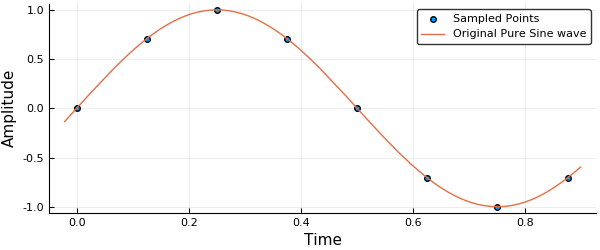

In [2]:
using Plots
pyplot()
n=8 # Number of Sample 
τ=1/8
t=0:τ:1-τ # The last minus term is to get the number of sample exactly equal n
y=sin.(t*(2π))
scatter(t,y, label="Sampled Points",size=(600,250))
plot!(t->sin(t*(2π)), label="Original Pure Sine wave")
xlabel!("Time")
ylabel!("Amplitude")


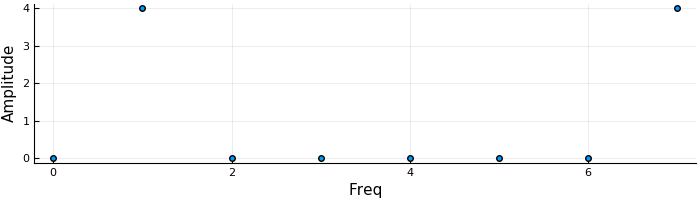

In [3]:
F=fft(y)
scatter((0:n-1),abs.(F),leg=false, size=(700,200),xlabel="Freq", ylabel="Amplitude")

This not above is normalized. 
Now we ignore the points beyoud the Nyquest limit and multiply the amplitue by 2


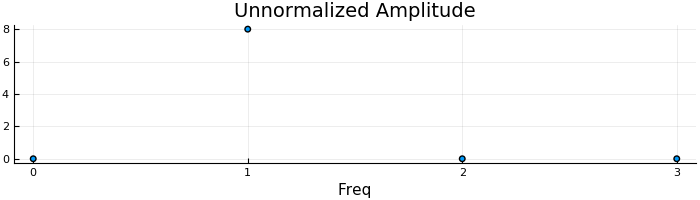

In [4]:
F=F[1:div(n,2)]*2
scatter(0:n/2-1,abs.(F),leg=false, size=(700,200),xlabel="Freq",  title="Unnormalized Amplitude")

In [5]:
angle(F[2])≈-π/2 # The phase shift

true

In [6]:
amplitude=abs(F[2])/n

1.0

# Now we work a slighly more complex example
Here we have shifted cosine funtion with some noise added 


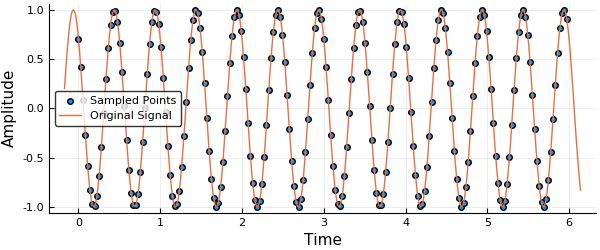

In [7]:
n=214
t_end=6
τ=t_end/n
t=0:τ:t_end-τ
y=cos.(4π*t+π/4) #2Hz
scatter(t,y, label="Sampled Points",size=(600,250))
plot!(t->cos(4π*t+π/4), label="Original Signal")
xlabel!("Time")
ylabel!("Amplitude")


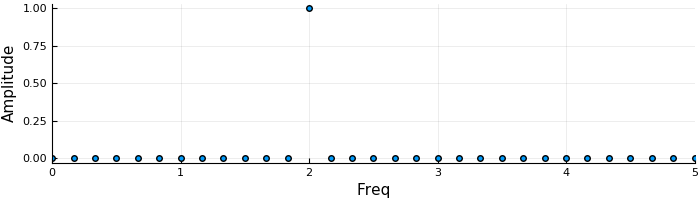

In [8]:
F=fft(y) 
# Removing points beyond the Nyquest limit and normalizing
F=F[1:div(n,2)]*2/n
freq_s=1/τ
scale_fac=freq_s/n
freq_range=(0:n/2-1)*scale_fac
scatter(freq_range,abs.(F),leg=false, size=(700,200),xlabel="Freq", ylabel="Amplitude", xlims=(0,5))


The maximum frequency 

In [9]:
ind_peek_f=indmax(abs.(F))
freq_range[ind_peek_f]

2.0

It is 2Hz 
Now we check the phase shift

In [10]:
angle(F[ind_peek_f])≈π/4

true

We recovered the signal perfectly. Now we do something more challenging

# More complex signal, with three components


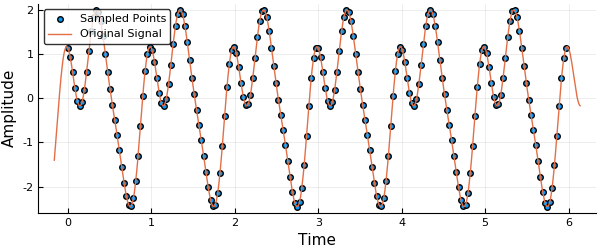

In [11]:
n=214
t_end=6
τ=t_end/n
t=0:τ:t_end-τ
y=@. cos(4π*t+π/4) + 1.5*sin(2π*t)+0.5*cos(6π*t+π/6) #2Hz with amp=1, 1Hz with amp=1.5, 3Hz with amp=0.5 
scatter(t,y, label="Sampled Points",size=(600,250))
plot!(t-> cos(4π*t+π/4) + 1.5*sin(2π*t)+0.5*cos(6π*t+π/6), label="Original Signal")
xlabel!("Time")
ylabel!("Amplitude")


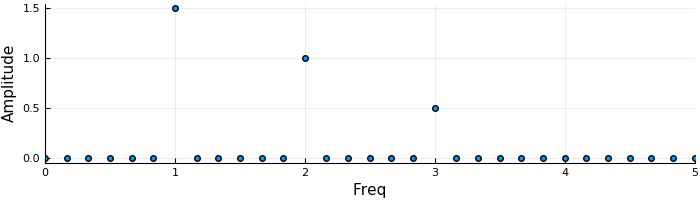

In [12]:
F=fft(y) 
# Removing points beyond the Nyquest limit and normalizing
F=F[1:div(n,2)]*2/n
freq_s=1/τ
scale_fac=freq_s/n
freq_range=(0:n/2-1)*scale_fac
amplitude=abs.(F)
scatter(freq_range,amplitude,leg=false, size=(700,200),xlabel="Freq", ylabel="Amplitude", xlims=(0,5))

In [13]:
# The top frequencies
ind_top=sortperm(amplitude,rev=true)[1:3]
top_freq=freq_range[ind_top]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [14]:
# Corresponding phase shift
F[ind_top].|>angle.≈[-π/2,π/4,π/6]

3-element BitArray{1}:
 true
 true
 true

# Adding noise


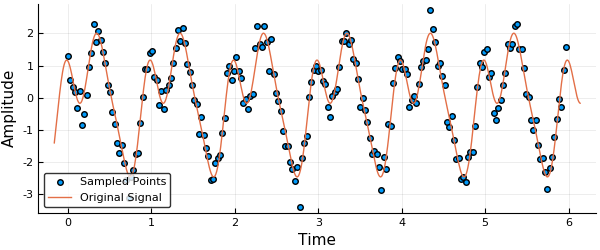

In [15]:
n=214
t_end=6
τ=t_end/n
t=0:τ:t_end-τ
noise_mag=0.3
y=randn(n)*noise_mag + @. cos(4π*t+π/4) + 1.5*sin(2π*t)+0.5*cos(6π*t+π/6) #2Hz with amp=1, 1Hz with amp=1.5, 3Hz with amp=0.5 
scatter(t,y, label="Sampled Points",size=(600,250))
plot!(t-> cos(4π*t+π/4) + 1.5*sin(2π*t)+0.5*cos(6π*t+π/6), label="Original Signal")
xlabel!("Time")
ylabel!("Amplitude")


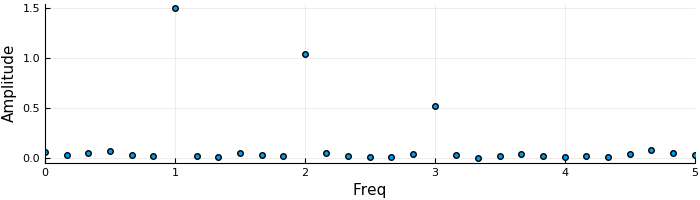

In [16]:
F=fft(y) 
# Removing points beyond the Nyquest limit and normalizing
F=F[1:div(n,2)]*2/n
freq_s=1/τ
scale_fac=freq_s/n
freq_range=(0:n/2-1)*scale_fac
amplitude=abs.(F)
scatter(freq_range,amplitude,leg=false, size=(700,200),xlabel="Freq", ylabel="Amplitude", xlims=(0,5))

In [17]:
# The top frequencies
ind_top=sortperm(amplitude,rev=true)[1:3]
top_freq=freq_range[ind_top]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [18]:
# Amplitudes
amplitude[ind_top]

3-element Array{Float64,1}:
 1.49769 
 1.04683 
 0.526687

A little off. Now we check the phase shift. 

In [19]:
# Corresponding phase shift
F[ind_top].|>angle

3-element Array{Float64,1}:
 -1.56054 
  0.817591
  0.452403

In [20]:
[-π/2,π/4,π/6]

3-element Array{Float64,1}:
 -1.5708  
  0.785398
  0.523599

Also a bit off. Not surprising. The noise corrupted our signal. 